# Laporan Data Operasional Temprina

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np
import pickle
import regex as re
from collections import defaultdict

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Hypotesis Testing
from scipy.stats import kstest, mannwhitneyu, chi2_contingency

import warnings
warnings.filterwarnings("ignore")

#Import Data

In [ ]:
 #Import Data
df1 = pd.read_excel("Januari_2024.xlsx")
df2 = pd.read_excel("Februari_2024.xlsx")
df3 = pd.read_excel("Maret_2024.xlsx")
df4 = pd.read_excel("April_2024.xlsx")
df5 = pd.read_excel("Mei_2024.xlsx")
df6 = pd.read_excel("Juni_2024.xlsx")
p_mesin = pd.read_excel("Data Performa Mesin Cetak e.xlsx")
# last_data = pd.read_excel("Laporan Data Produksi.xlsx")
df1.head()

,CABANG,NO PRODUKSI,SPK,TANGGAL,OPLAH MEDIA,HASIL CETAK,KONFIGURASI,JML WEB,JML WEB GROSS CETAK,VEL / KATERN,...,WASTE KUPASAN BAHAN,NAMA MESIN,PRESETTING START,PRESETTING END,START MESIN,ENDING MESIN,DURASI MESIN,LAMA TROUBLE,DURASI EFEKTIF,KETERANGAN
0,PT. TMG - SBY,SBY-PRD-01/24-0333 -- CETAK - CETAK SHEET,0001/SPK/01-24 / 1 -- SAHABAT -- JANUARI 2023,2024-01-06,8000.0,8180.0,4/4,1.0,0,2B,...,0.0,Sheet Line 2 (Komori LG440),2024-01-05 16:00:00,2024-01-05 16:20:00,2024-01-05 16:20:00,2024-01-05 17:15:00,75,0,75,-2B
1,PT. TMG - SBY,SBY-PRD-01/24-0333 -- CETAK - CETAK SHEET,0001/SPK/01-24 / 1 -- SAHABAT -- JANUARI 2023,2024-01-06,8000.0,8180.0,4/4,1.0,0,2B,...,0.0,Sheet Line 2 (Komori LG440),2024-01-05 16:00:00,2024-01-05 16:20:00,2024-01-05 16:20:00,2024-01-05 17:15:00,75,0,75,-2B
2,PT. TMG - SBY,SBY-PRD-01/24-0333 -- CETAK - CETAK SHEET,0001/SPK/01-24 / 1 -- SAHABAT -- JANUARI 2023,2024-01-06,8000.0,8180.0,4/4,1.0,0,2B,...,0.0,Sheet Line 2 (Komori LG440),2024-01-05 16:00:00,2024-01-05 16:20:00,2024-01-05 16:20:00,2024-01-05 17:15:00,75,0,75,-2B
3,PT. TMG - SBY,SBY-PRD-01/24-0333 -- CETAK - CETAK SHEET,0001/SPK/01-24 / 1 -- SAHABAT -- JANUARI 2023,2024-01-06,8000.0,8180.0,4/4,1.0,0,2B,...,0.0,Sheet Line 2 (Komori LG440),2024-01-05 16:00:00,2024-01-05 16:20:00,2024-01-05 16:20:00,2024-01-05 17:15:00,75,0,75,-2B
4,PT. TMG - SBY,SBY-PRD-01/24-0326 -- CETAK - CETAK SHEET,0001/SPK/01-24 / 1 -- SAHABAT -- JANUARI 2023,2024-01-06,8000.0,8180.0,4/4,1.0,0,1B,...,0.0,Sheet Line 2 (Komori LG440),2024-01-05 14:45:00,2024-01-05 15:04:00,2024-01-05 15:04:00,2024-01-05 15:59:00,74,0,74,-1B


#Join Data

In [ ]:
#Tambahin pengecekan apakah data baru atau tidak
df = pd.concat([df1, df2, df3, df4, df5, df6],ignore_index=True).drop(columns='CABANG')
df.head()

,NO PRODUKSI,SPK,TANGGAL,OPLAH MEDIA,HASIL CETAK,KONFIGURASI,JML WEB,JML WEB GROSS CETAK,VEL / KATERN,SHIFF,...,WASTE KUPASAN BAHAN,NAMA MESIN,PRESETTING START,PRESETTING END,START MESIN,ENDING MESIN,DURASI MESIN,LAMA TROUBLE,DURASI EFEKTIF,KETERANGAN
0,SBY-PRD-01/24-0333 -- CETAK - CETAK SHEET,0001/SPK/01-24 / 1 -- SAHABAT -- JANUARI 2023,2024-01-06,8000.0,8180.0,4/4,1.0,0,2B,SIANG,...,0.0,Sheet Line 2 (Komori LG440),2024-01-05 16:00:00,2024-01-05 16:20:00,2024-01-05 16:20:00,2024-01-05 17:15:00,75,0,75,-2B
1,SBY-PRD-01/24-0333 -- CETAK - CETAK SHEET,0001/SPK/01-24 / 1 -- SAHABAT -- JANUARI 2023,2024-01-06,8000.0,8180.0,4/4,1.0,0,2B,SIANG,...,0.0,Sheet Line 2 (Komori LG440),2024-01-05 16:00:00,2024-01-05 16:20:00,2024-01-05 16:20:00,2024-01-05 17:15:00,75,0,75,-2B
2,SBY-PRD-01/24-0333 -- CETAK - CETAK SHEET,0001/SPK/01-24 / 1 -- SAHABAT -- JANUARI 2023,2024-01-06,8000.0,8180.0,4/4,1.0,0,2B,SIANG,...,0.0,Sheet Line 2 (Komori LG440),2024-01-05 16:00:00,2024-01-05 16:20:00,2024-01-05 16:20:00,2024-01-05 17:15:00,75,0,75,-2B
3,SBY-PRD-01/24-0333 -- CETAK - CETAK SHEET,0001/SPK/01-24 / 1 -- SAHABAT -- JANUARI 2023,2024-01-06,8000.0,8180.0,4/4,1.0,0,2B,SIANG,...,0.0,Sheet Line 2 (Komori LG440),2024-01-05 16:00:00,2024-01-05 16:20:00,2024-01-05 16:20:00,2024-01-05 17:15:00,75,0,75,-2B
4,SBY-PRD-01/24-0326 -- CETAK - CETAK SHEET,0001/SPK/01-24 / 1 -- SAHABAT -- JANUARI 2023,2024-01-06,8000.0,8180.0,4/4,1.0,0,1B,SIANG,...,0.0,Sheet Line 2 (Komori LG440),2024-01-05 14:45:00,2024-01-05 15:04:00,2024-01-05 15:04:00,2024-01-05 15:59:00,74,0,74,-1B


In [ ]:
# from google.colab import files
# df.to_excel('Data Produksi.xlsx')
# files.download('Data Produksi.xlsx')

#Cleaning Data
- Nama Mesin  
Disesuaikan antara data produksi dan data performa  

- SPK  
Menyesuaikan kode SPK antara data produksi dan target

- Tanggal Mulai dan Tanggal Selesai  
Tanggal mulai dan tanggal selesai harus dalam bulan yang sama  

- Durasi Downtime, Efektif  
Durasi harus lebih dari 0 dan kurang dari 744 dan perhitungan total durasi harus dikelompokkan berdasarkan no produksi

- Total Cetak  
Seusaikan antara hasil cetak dari data dengan max speed kali durasi  

- Nilai Tidak Konsisten  
Ada mesin yang sama namun memiliki nilai yang berbeda

- Nilai Kosong  
Nilai kosong memang ada yang kosong dan tidak boleh diisi dan ada nilai kosong yang nilainya dalam satu nomer produksi atau satu SPK

- Tandai data yang ada keslahan

## Nama Mesin

In [ ]:
#Nama Mesin

mesin_pracetak = {"AGFA SCREEN":"AGFA SCREEN - SCREEN R 8600-S",
                  "TRENDSETTER Kodak TS 2":"TRENDSETTER KODAK TS 2 - CTP 4",
                  "Trendsetter Kodak XD TS 1":"TRENDSETTER KODAK XD TS 1 - CTP 3",
                  "SCREEN N2000 -S I":"SCREEN N2000 -S I - CTP 1",
                  "SCREEN N2000 S 2":"SCREEN N2000 S 2 - CTP 2"}

mesin_cetaksheet = {"Sheet Line 2 (Komori LG440)":"SHEET LINE 2 (KOMORI LG440) - SHEET LINE 2",
                    "Sheet Line 1 (Komori LS440)":"SHEET LINE 1 (KOMORI LS440) - SHEET LINE 1",
                    "KOMORI LINTHRONE S 440 P":"SHEET LINE 1 (KOMORI LS440) - SHEET LINE 1",
                    "CETAK SHEET HEIDELBERG DRUCK":"CETAK SHEET HEIDELBERG DRUCK - MASCHINEN AKTIENGESELISCHAFT",
                    "HEIDEL BERG SM 102":"CETAK SHEET HEIDELBERG DRUCK - MASCHINEN AKTIENGESELISCHAFT"}

mesin_cetakweb = {"Web Line 6 (Universal 630)":"WEB LINE 6 (UNIVERSAL 630) - WEB LINE 6",
                  "Web Line 1 (Uniset 60 )":"WEB LINE 1 (UNISET 60 ) - WEB - 3C,3C,3C,FOLDER,4H,5RS - SWDC - 4/4,4/2,2/1 - 60.000/CPH - 7 JAM",
                  "Universal":"UNIVERSAL - WEB LINE 3- 4H,4H,FOLDER,4H",
                  "Universal 63 - ex bks":"WEB LINE 6 (UNIVERSAL 630) - WEB LINE 6",
                  "WEB SOLNA Cut Off 546 02 (BARU)":"WEB SOLNA CUT OFF 546 02 (BARU) - TMG SBY 2023",
                  "Web Line 2 (Uniset 60)":"WEB LINE 2 (UNISET 60) - WEB LINE 2,4H,3C,4H,FOLDER,4H,4H",
                  "WEB TENSOR CUT OFF 63-DEPA":"WEB TENSOR CUT OFF 63-DEPA - PERLINTASAN RP14,-1/1",
                  "WEB SOLNA Cut Off 546 01 (SECOND)":"WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023",
                  "GLOBAL WEB 630 LINE 7":"GLOBAL WEB 630 LINE 7 - CUTT OFF 630 4/4"}

mesin_finishing = {
"CASE IN EX BOOK PRODUCTION LINE" : "CASE IN EX BOOK PRODUCTION LINE - KOLBUS BF 512, SN :144",
"CASE MAKER KOLBUS DA260" : "CASE MAKER KOLBUS DA260 - 2010 GERMANY",
"COLLATOR 24 FEEDER 2011" : "COLLATOR 24 FEEDER 2011 - SPRINTER E, SN : 151",
"MESIN SEWING ASTER EVO 1" : "MESIN SEWING ASTER EVO 1 - BARU",
"Muller 1" : "MULLER PRESTO - STITCHING",
"MULLER PRESTO" : "MULLER PRESTO - STITCHING",
"NEW YOSHINO VEGA" : "NEW YOSHINO VEGA - TYPE 121 BINDER - FR JPN",
"Osako (muller3)" : "OSAKO (MULLER3) - STICHING 3",
"SIDEBLAD (END SHEET) EX BOOK PRODUC LINE" : "SIDEBLAD (END SHEET) EX BOOK PRODUC LINE - SIGLOCH BBL-3 1/2 SN 28-057",
"TRIMMER EX BOOK PRODUCTION LINE" : "TRIMMER EX BOOK PRODUCTION LINE - KOLBUS HD 130, SN : 83",
"YOSHINO" : "NEW YOSHINO VEGA - TYPE 121 BINDER - FR JPN"}

In [ ]:
mesin_pakai = [
"AGFA SCREEN - SCREEN R 8600-S",
"CASE IN EX BOOK PRODUCTION LINE - KOLBUS BF 512, SN :144",
"CASE MAKER KOLBUS DA260 - 2010 GERMANY",
"CETAK SHEET HEIDELBERG DRUCK - MASCHINEN AKTIENGESELISCHAFT",
"COLLATOR 24 FEEDER 2011 - SPRINTER E, SN : 151",
"GLOBAL WEB 630 LINE 7 - CUTT OFF 630 4/4",
"MESIN SEWING ASTER EVO 1 - BARU",
"MULLER PRESTO - STITCHING",
"NEW YOSHINO VEGA - TYPE 121 BINDER - FR JPN",
"OSAKO (MULLER3) - STICHING 3",
"SCREEN N2000 S 2 - CTP 2",
"SCREEN N2000 -S I - CTP 1",
"SHEET LINE 1 (KOMORI LS440) - SHEET LINE 1",
"SHEET LINE 2 (KOMORI LG440) - SHEET LINE 2",
"SIDEBLAD (END SHEET) EX BOOK PRODUC LINE - SIGLOCH BBL-3 1/2 SN 28-057",
"TRENDSETTER KODAK TS 2 - CTP 4",
"TRENDSETTER KODAK XD TS 1 - CTP 3",
"TRIMMER EX BOOK PRODUCTION LINE - KOLBUS HD 130, SN : 83",
"UNIVERSAL - WEB LINE 3- 4H,4H,FOLDER,4H",
"WEB LINE 1 (UNISET 60 ) - WEB - 3C,3C,3C,FOLDER,4H,5RS - SWDC - 4/4,4/2,2/1 - 60.000/CPH - 7 JAM",
"WEB LINE 2 (UNISET 60) - WEB LINE 2,4H,3C,4H,FOLDER,4H,4H",
"WEB LINE 6 (UNIVERSAL 630) - WEB LINE 6",
"WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023",
"WEB SOLNA CUT OFF 546 02 (BARU) - TMG SBY 2023",
"WEB TENSOR CUT OFF 63-DEPA - PERLINTASAN RP14,-1/1"
]

In [ ]:
df['MESIN'] = df['NAMA MESIN']
df["MESIN"] = df["MESIN"].replace(mesin_pracetak)
df["MESIN"] = df["MESIN"].replace(mesin_cetaksheet)
df["MESIN"] = df["MESIN"].replace(mesin_cetakweb)
df["MESIN"] = df["MESIN"].replace(mesin_finishing)
data = df.loc[df['MESIN']!=df["NAMA MESIN"],:]
pd.DataFrame(data['MESIN'].value_counts().sort_values()).sort_values('MESIN')

,count
MESIN,
AGFA SCREEN - SCREEN R 8600-S,2059
"CASE IN EX BOOK PRODUCTION LINE - KOLBUS BF 512, SN :144",140
CASE MAKER KOLBUS DA260 - 2010 GERMANY,78
CETAK SHEET HEIDELBERG DRUCK - MASCHINEN AKTIENGESELISCHAFT,71
"COLLATOR 24 FEEDER 2011 - SPRINTER E, SN : 151",92
GLOBAL WEB 630 LINE 7 - CUTT OFF 630 4/4,250
MESIN SEWING ASTER EVO 1 - BARU,195
MULLER PRESTO - STITCHING,647
NEW YOSHINO VEGA - TYPE 121 BINDER - FR JPN,835


In [ ]:
data = data.loc[data['MESIN'].isin(mesin_pakai),:]

In [ ]:
data['MESIN'].nunique()

25

## No SPK

In [ ]:
data["NO SPK"] = data["SPK"].apply(lambda x:x.split()[0]+x.split()[1]+x.split()[2])
data["NO SPK"]

,NO SPK
0,0001/SPK/01-24/1
1,0001/SPK/01-24/1
2,0001/SPK/01-24/1
3,0001/SPK/01-24/1
4,0001/SPK/01-24/1
...,...
68755,DUMMY/0
68766,DUMMY/0
68768,DUMMY/0
68770,DUMMY/0


## Duplikat Data

In [ ]:
data.drop(columns='NO PRODUKSI').duplicated().sum()

99

In [ ]:
data.loc[data.drop(columns='NO PRODUKSI').duplicated()].sort_values(by="SPK")

,NO PRODUKSI,SPK,TANGGAL,OPLAH MEDIA,HASIL CETAK,KONFIGURASI,JML WEB,JML WEB GROSS CETAK,VEL / KATERN,SHIFF,...,PRESETTING START,PRESETTING END,START MESIN,ENDING MESIN,DURASI MESIN,LAMA TROUBLE,DURASI EFEKTIF,KETERANGAN,MESIN,NO SPK
55788,SBY-PRD-06/24-0222 -- PRA CETAK -,0011/SPK/06-24 / 1 -- PENDIDIKAN PANCASILA UNT...,2024-06-08,16700.0,NaN,NaN,NaN,0,NaN,NaN,...,NaT,NaT,2024-06-05 01:24:00,2024-06-05 01:36:00,12,0,12,-BS SD K-21 (BATCH 3) PENDIDIKAN PANCASILA 4-C...,AGFA SCREEN - SCREEN R 8600-S,0011/SPK/06-24/1
56499,SBY-PRD-06/24-0558 -- PRA CETAK -,0030/SPK/06-24 / 1 -- MATEMATIKA UNTUK SMP/MTS...,2024-06-15,13000.0,NaN,NaN,NaN,0,NaN,NaN,...,NaT,NaT,2024-06-11 16:10:00,2024-06-11 16:22:00,12,0,12,-Buku K21 BS SMP Matematika Kelas 7 - Cover,AGFA SCREEN - SCREEN R 8600-S,0030/SPK/06-24/1
12995,SBY-PRD-02/24-0049 -- PRA CETAK -,0050/SPK/02-24 / 1 -- MEMO KEDIRI -- 02-02-2024,2024-02-02,501.0,NaN,NaN,NaN,0,NaN,NaN,...,NaT,NaT,2024-02-01 21:52:00,2024-02-01 22:09:00,17,0,17,-Memo Kediri\n02-02,SCREEN N2000 -S I - CTP 1,0050/SPK/02-24/1
13684,SBY-PRD-02/24-0195 -- PRA CETAK -,0113/SPK/02-24 / 1 -- JP + RADAR MADURA -- 07-...,2024-02-06,1704.0,NaN,NaN,NaN,0,NaN,NaN,...,NaT,NaT,2024-02-06 22:01:00,2024-02-06 22:14:00,13,0,13,-Radar Madura\n07.02,TRENDSETTER KODAK TS 2 - CTP 4,0113/SPK/02-24/1
1406,SBY-PRD-01/24-0202 -- FINISHING - CASE_IN KOMPLIT,0127/SPK/11-23 / 1 -- (JANGAN DIPAKAI) KITAB J...,2024-01-08,10000.0,353.0,NaN,NaN,0,NaN,SIANG,...,2024-01-08 07:00:00,2024-01-08 07:05:00,2024-01-08 07:05:00,2024-01-08 13:50:00,410,0,410,NaN,CASE IN EX BOOK PRODUCTION LINE - KOLBUS BF 51...,0127/SPK/11-23/1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9335,SBY-PRD-01/24-1154 -- CETAK - CETAK WEB,0931/SPK/11-23 / 1 -- SURAT SUARA PEMILU ANGGO...,2024-01-27,110621.0,11185.0,4/4,1.0,12020,1,SIANG,...,2024-01-27 08:00:00,2024-01-27 08:04:00,2024-01-27 08:04:00,2024-01-27 08:59:00,59,0,59,DPRD prov maluku 4,"UNIVERSAL - WEB LINE 3- 4H,4H,FOLDER,4H",0931/SPK/11-23/1
9334,SBY-PRD-01/24-1154 -- CETAK - CETAK WEB,0931/SPK/11-23 / 1 -- SURAT SUARA PEMILU ANGGO...,2024-01-27,110621.0,11185.0,4/4,1.0,12020,1,SIANG,...,2024-01-27 08:00:00,2024-01-27 08:04:00,2024-01-27 08:04:00,2024-01-27 08:59:00,59,0,59,DPRD prov maluku 4,"UNIVERSAL - WEB LINE 3- 4H,4H,FOLDER,4H",0931/SPK/11-23/1
9333,SBY-PRD-01/24-1154 -- CETAK - CETAK WEB,0931/SPK/11-23 / 1 -- SURAT SUARA PEMILU ANGGO...,2024-01-27,110621.0,11185.0,4/4,1.0,12020,1,SIANG,...,2024-01-27 08:00:00,2024-01-27 08:04:00,2024-01-27 08:04:00,2024-01-27 08:59:00,59,0,59,DPRD prov maluku 4,"UNIVERSAL - WEB LINE 3- 4H,4H,FOLDER,4H",0931/SPK/11-23/1
10140,SBY-PRD-01/24-1658 -- PRA CETAK -,1264/SPK/11-23 / 1 -- FORMULIR MODEL C.HASIL-D...,2024-01-30,44140.0,NaN,NaN,NaN,0,NaN,NaN,...,NaT,NaT,2024-01-29 07:10:00,2024-01-29 08:30:00,80,0,80,-FORMULIR DPR RI NTB 2\nNTB,AGFA SCREEN - SCREEN R 8600-S,1264/SPK/11-23/1


## Tanggal

### Bulan dan Tahun

In [ ]:
data['Bulan'] = data['TANGGAL'].dt.month_name()
data['Tahun'] = data['TANGGAL'].dt.year

In [ ]:
if (data["Tahun"].max() - data['Tahun'].min())>=5:
  data = data.loc[data['Tahun']>=data['Tahun'].max()-4,:]
data['Tahun'].min(),data['Tahun'].max()

(2024, 2024)

### Presetting start & end

Beda Bulan

In [ ]:
index_tanggal = data.loc[(data['PRESETTING START'].dt.month!=data['PRESETTING END'].dt.month)&(data['PRESETTING START'].isna()==False),:].index
data["Salah Tanggal"] = 0
data.loc[index_tanggal,["Salah Tanggal"]] = 1
data.loc[(data['PRESETTING START'].dt.month!=data['PRESETTING END'].dt.month)&(data['PRESETTING START'].isna()==False),:].shape

(1, 30)

In [ ]:
data.loc[(data['PRESETTING START'].dt.month!=data['PRESETTING END'].dt.month)&(data['PRESETTING START'].isna()==False),["TANGGAL","PRESETTING START","PRESETTING END"]]

,TANGGAL,PRESETTING START,PRESETTING END
65749,2024-06-07,2024-06-06 23:30:00,2024-07-06 01:45:00


In [ ]:
data.loc[(data['PRESETTING START'].dt.month!=data['PRESETTING END'].dt.month)&(data['PRESETTING START'].isna()==False),'PRESETTING END'] = data.loc[(data['PRESETTING START'].dt.month!=data['PRESETTING END'].dt.month)&(data['PRESETTING START'].isna()==False),'PRESETTING END'] - pd.Timedelta(days=29)
data.loc[(data['PRESETTING START'].dt.month!=data['PRESETTING END'].dt.month)&(data['PRESETTING START'].isna()==False),:].shape

(0, 30)

Belum ganti hari

In [ ]:
index_tanggal = data.loc[(data['PRESETTING START']>data['PRESETTING END'])&(data['PRESETTING START'].isna()==False),:].index
data.loc[index_tanggal,["Salah Tanggal"]] = 1
data.loc[(data['PRESETTING START']>data['PRESETTING END'])&(data['PRESETTING START'].isna()==False),:].shape

(1, 30)

In [ ]:
data.loc[(data['PRESETTING START']>data['PRESETTING END'])&(data['PRESETTING START'].isna()==False),["TANGGAL","PRESETTING START","PRESETTING END"]]

,TANGGAL,PRESETTING START,PRESETTING END
67700,2024-06-11,2024-06-10 23:30:00,2024-06-10 00:10:00


In [ ]:
data.loc[(data['PRESETTING START']>data['PRESETTING END'])&(data['PRESETTING START'].isna()==False),["PRESETTING END"]] = data.loc[(data['PRESETTING START']>data['PRESETTING END'])&(data['PRESETTING START'].isna()==False),["PRESETTING END"]] + pd.Timedelta(days=1)
data.loc[(data['PRESETTING START']>data['PRESETTING END'])&(data['PRESETTING START'].isna()==False),:].shape

(0, 30)

### Start & Ending Mesin

Beda Bulan

In [ ]:
index_tanggal = data.loc[(data['START MESIN'].dt.month!=data['ENDING MESIN'].dt.month),:].index
data.loc[index_tanggal,["Salah Tanggal"]] = 1
data.loc[(data['START MESIN'].dt.month!=data['ENDING MESIN'].dt.month),:].shape

(42, 30)

In [ ]:
data.loc[(data['START MESIN'].dt.month!=data['ENDING MESIN'].dt.month),["TANGGAL","START MESIN","ENDING MESIN"]].head()

,TANGGAL,START MESIN,ENDING MESIN
20764,2024-02-02,2024-02-01 20:19:00,2024-03-01 05:59:00
20765,2024-02-02,2024-02-01 20:19:00,2024-03-01 05:59:00
20766,2024-02-02,2024-02-01 20:19:00,2024-03-01 05:59:00
20767,2024-02-02,2024-02-01 20:19:00,2024-03-01 05:59:00
20768,2024-02-02,2024-02-01 20:19:00,2024-03-01 05:59:00


In [ ]:
data.loc[(data['START MESIN'].dt.month!=data['ENDING MESIN'].dt.month),'ENDING MESIN'] = data.loc[(data['START MESIN'].dt.month!=data['ENDING MESIN'].dt.month),'ENDING MESIN'] - pd.Timedelta(days=29)
data.loc[(data['START MESIN'].dt.month!=data['ENDING MESIN'].dt.month),:].shape

(0, 30)

Belum ganti hari

In [ ]:
index_tanggal = data.loc[(data['START MESIN']>data['ENDING MESIN']),:].index
data.loc[index_tanggal,["Salah Tanggal"]] = 1
data.loc[(data['START MESIN']>data['ENDING MESIN']),:].shape

(10, 30)

In [ ]:
data.loc[(data['START MESIN']>data['ENDING MESIN']),["TANGGAL","START MESIN","ENDING MESIN"]]

,TANGGAL,START MESIN,ENDING MESIN
20764,2024-02-02,2024-02-01 20:19:00,2024-02-01 05:59:00
20765,2024-02-02,2024-02-01 20:19:00,2024-02-01 05:59:00
20766,2024-02-02,2024-02-01 20:19:00,2024-02-01 05:59:00
20767,2024-02-02,2024-02-01 20:19:00,2024-02-01 05:59:00
20768,2024-02-02,2024-02-01 20:19:00,2024-02-01 05:59:00
20806,2024-02-02,2024-02-02 20:00:00,2024-02-02 02:30:00
20807,2024-02-02,2024-02-02 20:00:00,2024-02-02 02:30:00
20808,2024-02-02,2024-02-02 20:00:00,2024-02-02 02:30:00
20809,2024-02-02,2024-02-02 20:00:00,2024-02-02 02:30:00
20810,2024-02-02,2024-02-02 20:00:00,2024-02-02 02:30:00


In [ ]:
data.loc[(data['START MESIN']>data['ENDING MESIN']),["ENDING MESIN"]] = data.loc[(data['START MESIN']>data['ENDING MESIN']),["ENDING MESIN"]] + pd.Timedelta(days=1)
data.loc[(data['START MESIN']>data['ENDING MESIN']),:].shape

(0, 30)

### Total Kesalahan

In [ ]:
data["Salah Tanggal"].value_counts()

,count
Salah Tanggal,
0,57194
1,49


## Durasi Efektif

Jika durasi lebih dari 1000 atau kurang dari 0 maka perlu disesuakan antara tanggal laporan dan tanggal presetting dan ending mesin

In [ ]:
data.loc[data['DURASI MESIN']>40000,:].shape

(43, 30)

In [ ]:
data.loc[data['DURASI MESIN']<0,:].shape

(6, 30)

### Durasi Mesin

In [ ]:
#Menghitung durasi setting mesin
data['DURASI SETTING HIT'] = data['PRESETTING END'] - data['PRESETTING START']
data['DURASI SETTING HIT'] = data['DURASI SETTING HIT'].dt.total_seconds()/60
data['DURASI SETTING HIT'] = data['DURASI SETTING HIT'].fillna(0)

#Menghitung durasi kerja mesin
data['DURASI MESIN HIT'] = data['ENDING MESIN'] - data['START MESIN']
data['DURASI MESIN HIT'] = data['DURASI MESIN HIT'].dt.total_seconds()/60

#Menghitung total durasi mesin
data['DURASI TOTAL HIT'] = data['DURASI SETTING HIT'] + data['DURASI MESIN HIT']
# data.head()

In [ ]:
print("Kesalahan pada durasi setting :",data.loc[data['DURASI SETTING HIT']<0,:].shape)
print("Kesalahan pada durasi mesin :",data.loc[data['DURASI MESIN HIT']<0,:].shape)


Kesalahan pada durasi setting : (0, 33)
Kesalahan pada durasi mesin : (0, 33)


In [ ]:
#Cek durasi mesin yang terlalu lama
data.loc[data['DURASI TOTAL HIT']>120,:].shape

(9962, 33)

### Lama Trouble

Lama trouble negatif

In [ ]:
index_trouble = data.loc[data["LAMA TROUBLE"]<0,:].index
data["Salah Trouble"] = 0
data.loc[index_trouble,["Salah Trouble"]] = 1
data.loc[data["LAMA TROUBLE"]<0,:].shape

(54, 34)

In [ ]:
data.loc[data["LAMA TROUBLE"]<0,["TANGGAL","MESIN","LAMA TROUBLE"]].head()

,TANGGAL,MESIN,LAMA TROUBLE
15785,2024-02-07,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,-4
15786,2024-02-07,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,-4
15787,2024-02-07,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,-4
15788,2024-02-07,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,-4
15789,2024-02-07,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,-4


In [ ]:
#Untuk sementara dirubah menjadi 0
data.loc[data["LAMA TROUBLE"]<0,"LAMA TROUBLE"] = 0

Lama Trouble lebih lama daripada durasi mesin

In [ ]:
index_trouble = data.loc[data["LAMA TROUBLE"]>data['DURASI MESIN HIT'],:].index
data.loc[index_trouble,["Salah Trouble"]] = 1
data.loc[data["LAMA TROUBLE"]>data['DURASI MESIN HIT'],:].shape

(1056, 34)

In [ ]:
data.loc[data["LAMA TROUBLE"]>data['DURASI MESIN HIT'],["TANGGAL","MESIN","DURASI MESIN HIT", "LAMA TROUBLE"]].head()

,TANGGAL,MESIN,DURASI MESIN HIT,LAMA TROUBLE
392,2024-01-01,"UNIVERSAL - WEB LINE 3- 4H,4H,FOLDER,4H",45.0,55
393,2024-01-01,"UNIVERSAL - WEB LINE 3- 4H,4H,FOLDER,4H",45.0,55
394,2024-01-01,"UNIVERSAL - WEB LINE 3- 4H,4H,FOLDER,4H",45.0,55
395,2024-01-01,"UNIVERSAL - WEB LINE 3- 4H,4H,FOLDER,4H",45.0,55
396,2024-01-01,"UNIVERSAL - WEB LINE 3- 4H,4H,FOLDER,4H",45.0,55


In [ ]:
#Untuk sementara dirubah menjadi 0
data.loc[data["LAMA TROUBLE"]>data['DURASI MESIN HIT'],"LAMA TROUBLE"] = 0

### Durasi Efektif

In [ ]:
data['DURASI EFEKTIF HIT'] = data['DURASI TOTAL HIT'] - data['LAMA TROUBLE']
data.loc[data['DURASI EFEKTIF HIT']>3000,:].shape

(17, 35)

In [ ]:
data.loc[data['DURASI EFEKTIF HIT']<0,:].shape

(0, 35)

### Total Kesalahan

In [ ]:
data["Salah Trouble"].value_counts()

,count
Salah Trouble,
0,56133
1,1110


### Max Speed

In [ ]:
maxspeed = p_mesin.groupby(['MESIN'])['MAX SPEED MACHINE /HOUR'].max().round(0).to_frame().reset_index()
maxspeed

,MESIN,MAX SPEED MACHINE /HOUR
0,AGFA SCREEN - SCREEN R 8600-S,25.0
1,CASE IN EX BOOK PRODUCTION LINE - KOLBUS BF 51...,1200.0
2,CASE MAKER KOLBUS DA260 - 2010 GERMANY,1050.0
3,CETAK SHEET HEIDELBERG DRUCK - MASCHINEN AKTIE...,15000.0
4,"COLLATOR 24 FEEDER 2011 - SPRINTER E, SN : 151",4000.0
5,GLOBAL WEB 630 LINE 7 - CUTT OFF 630 4/4,43605.0
6,MESIN SEWING ASTER EVO 1 - BARU,29000.0
7,MULLER PRESTO - STITCHING,5913.0
8,NEW YOSHINO VEGA - TYPE 121 BINDER - FR JPN,6630.0
9,OSAKO (MULLER3) - STICHING 3,6000.0


In [ ]:
# from google.colab import files
# maxspeed.to_excel('speed mesin.xlsx')
# files.download('speed mesin.xlsx')

In [ ]:
data = data.merge(maxspeed,left_on='MESIN',right_on='MESIN',how='left').rename(columns={"MAX SPEED MACHINE /HOUR":"MAX SPEED MACHINE"})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57243 entries, 0 to 57242
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   NO PRODUKSI          57243 non-null  object        
 1   SPK                  57243 non-null  object        
 2   TANGGAL              57243 non-null  datetime64[ns]
 3   OPLAH MEDIA          54857 non-null  float64       
 4   HASIL CETAK          49892 non-null  float64       
 5   KONFIGURASI          46429 non-null  object        
 6   JML WEB              46429 non-null  float64       
 7   JML WEB GROSS CETAK  57243 non-null  int64         
 8   VEL / KATERN         28688 non-null  object        
 9   SHIFF                49892 non-null  object        
 10  JENIS BAHAN          55558 non-null  object        
 11  NAMA BAHAN           55558 non-null  object        
 12  QTY BAHAN            55558 non-null  float64       
 13  WASTE BAHAN          57243 non-

In [ ]:
data["PERFORMANCE"] = (data["HASIL CETAK"]/(data["DURASI MESIN HIT"]-data['LAMA TROUBLE']))*100/data["MAX SPEED MACHINE"]
data.loc[data["PERFORMANCE"]>1].shape

(19808, 37)

# Pengelompokan

## Kategori Mesin Cetak

In [ ]:
kategori = p_mesin[['KATEGORI','MESIN']].drop_duplicates().reset_index(drop=True)
kategori

,KATEGORI,MESIN
0,PRACETAK,AGFA SCREEN - SCREEN R 8600-S
1,FINISHING,CASE IN EX BOOK PRODUCTION LINE - KOLBUS BF 51...
2,FINISHING,CASE MAKER KOLBUS DA260 - 2010 GERMANY
3,CETAK SHEET,CETAK SHEET HEIDELBERG DRUCK - MASCHINEN AKTIE...
4,FINISHING,"COLLATOR 24 FEEDER 2011 - SPRINTER E, SN : 151"
5,CETAK WEB,GLOBAL WEB 630 LINE 7 - CUTT OFF 630 4/4
6,FINISHING,MESIN SEWING ASTER EVO 1 - BARU
7,FINISHING,MULLER PRESTO - STITCHING
8,FINISHING,NEW YOSHINO VEGA - TYPE 121 BINDER - FR JPN
9,FINISHING,OSAKO (MULLER3) - STICHING 3


## Jumlah Penggunaan Mesin

### Jumlah SPK

In [ ]:
nspk = data.groupby(['Tahun','Bulan','MESIN'])["SPK"].nunique().to_frame().reset_index()
nspk

,Tahun,Bulan,MESIN,SPK
0,2024,April,AGFA SCREEN - SCREEN R 8600-S,207
1,2024,April,CASE IN EX BOOK PRODUCTION LINE - KOLBUS BF 51...,7
2,2024,April,CASE MAKER KOLBUS DA260 - 2010 GERMANY,5
3,2024,April,MESIN SEWING ASTER EVO 1 - BARU,1
4,2024,April,MULLER PRESTO - STITCHING,116
...,...,...,...,...
130,2024,May,"WEB LINE 2 (UNISET 60) - WEB LINE 2,4H,3C,4H,F...",27
131,2024,May,WEB LINE 6 (UNIVERSAL 630) - WEB LINE 6,14
132,2024,May,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,90
133,2024,May,WEB SOLNA CUT OFF 546 02 (BARU) - TMG SBY 2023,223


### Jumlah Produksi

In [ ]:
nprod = data.groupby(['Tahun','Bulan','MESIN'])["NO PRODUKSI"].nunique().to_frame().reset_index()
nprod

,Tahun,Bulan,MESIN,NO PRODUKSI
0,2024,April,AGFA SCREEN - SCREEN R 8600-S,298
1,2024,April,CASE IN EX BOOK PRODUCTION LINE - KOLBUS BF 51...,13
2,2024,April,CASE MAKER KOLBUS DA260 - 2010 GERMANY,7
3,2024,April,MESIN SEWING ASTER EVO 1 - BARU,10
4,2024,April,MULLER PRESTO - STITCHING,222
...,...,...,...,...
130,2024,May,"WEB LINE 2 (UNISET 60) - WEB LINE 2,4H,3C,4H,F...",304
131,2024,May,WEB LINE 6 (UNIVERSAL 630) - WEB LINE 6,61
132,2024,May,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,189
133,2024,May,WEB SOLNA CUT OFF 546 02 (BARU) - TMG SBY 2023,456


### Jumlah Kesalahan

In [ ]:
salah_tanggal = data.groupby(['Tahun','Bulan','MESIN'])["Salah Tanggal"].sum().to_frame().reset_index()
print("Total Kesalahan Tanggal :", salah_tanggal['Salah Tanggal'].sum())
salah_tanggal

Total Kesalahan Tanggal : 49


,Tahun,Bulan,MESIN,Salah Tanggal
0,2024,April,AGFA SCREEN - SCREEN R 8600-S,0
1,2024,April,CASE IN EX BOOK PRODUCTION LINE - KOLBUS BF 51...,0
2,2024,April,CASE MAKER KOLBUS DA260 - 2010 GERMANY,0
3,2024,April,MESIN SEWING ASTER EVO 1 - BARU,0
4,2024,April,MULLER PRESTO - STITCHING,4
...,...,...,...,...
130,2024,May,"WEB LINE 2 (UNISET 60) - WEB LINE 2,4H,3C,4H,F...",0
131,2024,May,WEB LINE 6 (UNIVERSAL 630) - WEB LINE 6,0
132,2024,May,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,0
133,2024,May,WEB SOLNA CUT OFF 546 02 (BARU) - TMG SBY 2023,0


In [ ]:
salah_trouble = data.groupby(['Tahun','Bulan','MESIN'])["Salah Trouble"].sum().to_frame().reset_index()
print("Total Kesalahan Durasi Trouble :", salah_trouble['Salah Trouble'].sum())
salah_trouble

Total Kesalahan Durasi Trouble : 1110


,Tahun,Bulan,MESIN,Salah Trouble
0,2024,April,AGFA SCREEN - SCREEN R 8600-S,0
1,2024,April,CASE IN EX BOOK PRODUCTION LINE - KOLBUS BF 51...,0
2,2024,April,CASE MAKER KOLBUS DA260 - 2010 GERMANY,0
3,2024,April,MESIN SEWING ASTER EVO 1 - BARU,0
4,2024,April,MULLER PRESTO - STITCHING,0
...,...,...,...,...
130,2024,May,"WEB LINE 2 (UNISET 60) - WEB LINE 2,4H,3C,4H,F...",14
131,2024,May,WEB LINE 6 (UNIVERSAL 630) - WEB LINE 6,0
132,2024,May,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,15
133,2024,May,WEB SOLNA CUT OFF 546 02 (BARU) - TMG SBY 2023,145


## Durasi Penggunaan Mesin

### Presetting

In [ ]:
presetting = data.groupby(['Tahun','Bulan','MESIN','NO PRODUKSI'])["DURASI SETTING HIT"].mean().to_frame().reset_index()
presetting = (presetting.groupby(['Tahun','Bulan','MESIN'])['DURASI SETTING HIT'].sum()/60).round(2).to_frame().reset_index()
presetting

,Tahun,Bulan,MESIN,DURASI SETTING HIT
0,2024,April,AGFA SCREEN - SCREEN R 8600-S,0.00
1,2024,April,CASE IN EX BOOK PRODUCTION LINE - KOLBUS BF 51...,4.38
2,2024,April,CASE MAKER KOLBUS DA260 - 2010 GERMANY,0.83
3,2024,April,MESIN SEWING ASTER EVO 1 - BARU,1.67
4,2024,April,MULLER PRESTO - STITCHING,38.88
...,...,...,...,...
130,2024,May,"WEB LINE 2 (UNISET 60) - WEB LINE 2,4H,3C,4H,F...",55.70
131,2024,May,WEB LINE 6 (UNIVERSAL 630) - WEB LINE 6,50.43
132,2024,May,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,29.95
133,2024,May,WEB SOLNA CUT OFF 546 02 (BARU) - TMG SBY 2023,40.58


In [ ]:
presetting.loc[(presetting['DURASI SETTING HIT']<0)|(presetting['DURASI SETTING HIT']>744)].shape

(0, 4)

### Downtime

In [ ]:
downtime = data.groupby(['Tahun','Bulan','MESIN','NO PRODUKSI'])["LAMA TROUBLE"].mean().to_frame().reset_index()
downtime = (downtime.groupby(['Tahun','Bulan','MESIN'])['LAMA TROUBLE'].sum()/60).round(2).to_frame().reset_index()
downtime

,Tahun,Bulan,MESIN,LAMA TROUBLE
0,2024,April,AGFA SCREEN - SCREEN R 8600-S,0.00
1,2024,April,CASE IN EX BOOK PRODUCTION LINE - KOLBUS BF 51...,0.00
2,2024,April,CASE MAKER KOLBUS DA260 - 2010 GERMANY,0.00
3,2024,April,MESIN SEWING ASTER EVO 1 - BARU,0.00
4,2024,April,MULLER PRESTO - STITCHING,0.00
...,...,...,...,...
130,2024,May,"WEB LINE 2 (UNISET 60) - WEB LINE 2,4H,3C,4H,F...",52.50
131,2024,May,WEB LINE 6 (UNIVERSAL 630) - WEB LINE 6,0.00
132,2024,May,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,15.10
133,2024,May,WEB SOLNA CUT OFF 546 02 (BARU) - TMG SBY 2023,26.95


In [ ]:
downtime.loc[(downtime['LAMA TROUBLE']<0)|(downtime['LAMA TROUBLE']>744)].shape

(0, 4)

### Uptime

In [ ]:
uptime = data.groupby(['Tahun','Bulan','MESIN','NO PRODUKSI'])["DURASI MESIN HIT"].mean().to_frame().reset_index()
uptime = (uptime.groupby(['Tahun','Bulan','MESIN'])['DURASI MESIN HIT'].sum()/60).round(2).to_frame().reset_index()
uptime

,Tahun,Bulan,MESIN,DURASI MESIN HIT
0,2024,April,AGFA SCREEN - SCREEN R 8600-S,82.07
1,2024,April,CASE IN EX BOOK PRODUCTION LINE - KOLBUS BF 51...,62.95
2,2024,April,CASE MAKER KOLBUS DA260 - 2010 GERMANY,48.80
3,2024,April,MESIN SEWING ASTER EVO 1 - BARU,54.37
4,2024,April,MULLER PRESTO - STITCHING,1136.32
...,...,...,...,...
130,2024,May,"WEB LINE 2 (UNISET 60) - WEB LINE 2,4H,3C,4H,F...",270.90
131,2024,May,WEB LINE 6 (UNIVERSAL 630) - WEB LINE 6,140.38
132,2024,May,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,82.02
133,2024,May,WEB SOLNA CUT OFF 546 02 (BARU) - TMG SBY 2023,171.75


In [ ]:
uptime.loc[(uptime['DURASI MESIN HIT']<0)|(uptime['DURASI MESIN HIT']>744)].shape

(5, 4)

### Duration Production

In [ ]:
durasip = uptime.copy().rename(columns={"DURASI MESIN HIT":"DURASI PRODUKSI"})
durasip['DURASI PRODUKSI'] = uptime['DURASI MESIN HIT'] - downtime['LAMA TROUBLE']
durasip

,Tahun,Bulan,MESIN,DURASI PRODUKSI
0,2024,April,AGFA SCREEN - SCREEN R 8600-S,82.07
1,2024,April,CASE IN EX BOOK PRODUCTION LINE - KOLBUS BF 51...,62.95
2,2024,April,CASE MAKER KOLBUS DA260 - 2010 GERMANY,48.80
3,2024,April,MESIN SEWING ASTER EVO 1 - BARU,54.37
4,2024,April,MULLER PRESTO - STITCHING,1136.32
...,...,...,...,...
130,2024,May,"WEB LINE 2 (UNISET 60) - WEB LINE 2,4H,3C,4H,F...",218.40
131,2024,May,WEB LINE 6 (UNIVERSAL 630) - WEB LINE 6,140.38
132,2024,May,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,66.92
133,2024,May,WEB SOLNA CUT OFF 546 02 (BARU) - TMG SBY 2023,144.80


In [ ]:
durasip.loc[(durasip['DURASI PRODUKSI']<0)|(durasip['DURASI PRODUKSI']>=700)]

,Tahun,Bulan,MESIN,DURASI PRODUKSI
4,2024,April,MULLER PRESTO - STITCHING,1136.32
6,2024,April,OSAKO (MULLER3) - STICHING 3,1030.80
8,2024,April,SHEET LINE 1 (KOMORI LS440) - SHEET LINE 1,753.15
9,2024,April,SHEET LINE 2 (KOMORI LG440) - SHEET LINE 2,891.52
43,2024,January,AGFA SCREEN - SCREEN R 8600-S,5783.75


## Hasil Cetakan Mesin

### Total Hasil Cetak

In [ ]:
hasilcetak = data.groupby(['Tahun','Bulan','MESIN','NO PRODUKSI'])['HASIL CETAK'].mean().to_frame().reset_index()
hasilcetak = hasilcetak.groupby(['Tahun','Bulan','MESIN'])['HASIL CETAK'].sum().to_frame().reset_index()
hasilcetak

,Tahun,Bulan,MESIN,HASIL CETAK
0,2024,April,AGFA SCREEN - SCREEN R 8600-S,0.0
1,2024,April,CASE IN EX BOOK PRODUCTION LINE - KOLBUS BF 51...,12497.0
2,2024,April,CASE MAKER KOLBUS DA260 - 2010 GERMANY,16236.0
3,2024,April,MESIN SEWING ASTER EVO 1 - BARU,10152.0
4,2024,April,MULLER PRESTO - STITCHING,3529809.0
...,...,...,...,...
130,2024,May,"WEB LINE 2 (UNISET 60) - WEB LINE 2,4H,3C,4H,F...",4526070.0
131,2024,May,WEB LINE 6 (UNIVERSAL 630) - WEB LINE 6,919950.0
132,2024,May,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,969931.0
133,2024,May,WEB SOLNA CUT OFF 546 02 (BARU) - TMG SBY 2023,3392767.0


### Waste Cetak

In [ ]:
waste_bahan = data.groupby(['Tahun','Bulan','MESIN'])['WASTE BAHAN'].sum().to_frame().reset_index()
waste_core_bahan = data.groupby(['Tahun','Bulan','MESIN'])['WASTE CORE BAHAN'].sum().to_frame().reset_index()
waste_kupasan_bahan = data.groupby(['Tahun','Bulan','MESIN'])['WASTE KUPASAN BAHAN'].sum().to_frame().reset_index()
waste = waste_bahan.copy().rename(columns={"WASTE BAHAN":"WASTE"})
waste["WASTE"] = (waste_bahan['WASTE BAHAN'] + waste_core_bahan['WASTE CORE BAHAN'] + waste_kupasan_bahan['WASTE KUPASAN BAHAN']).round(2)
waste

,Tahun,Bulan,MESIN,WASTE
0,2024,April,AGFA SCREEN - SCREEN R 8600-S,3.00
1,2024,April,CASE IN EX BOOK PRODUCTION LINE - KOLBUS BF 51...,0.00
2,2024,April,CASE MAKER KOLBUS DA260 - 2010 GERMANY,0.00
3,2024,April,MESIN SEWING ASTER EVO 1 - BARU,0.00
4,2024,April,MULLER PRESTO - STITCHING,0.00
...,...,...,...,...
130,2024,May,"WEB LINE 2 (UNISET 60) - WEB LINE 2,4H,3C,4H,F...",9090.81
131,2024,May,WEB LINE 6 (UNIVERSAL 630) - WEB LINE 6,2214.00
132,2024,May,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,3225.75
133,2024,May,WEB SOLNA CUT OFF 546 02 (BARU) - TMG SBY 2023,13522.00


### Hasil Cetak Baik

In [ ]:
# Untuk Mesin PRACETAK
bahan = data.groupby(['Tahun','Bulan','MESIN'])['QTY BAHAN'].sum().to_frame().reset_index()
bahan['QTY BAHAN'] = (bahan['QTY BAHAN'] - waste["WASTE"]).round(2)
bahan

,Tahun,Bulan,MESIN,QTY BAHAN
0,2024,April,AGFA SCREEN - SCREEN R 8600-S,1585.00
1,2024,April,CASE IN EX BOOK PRODUCTION LINE - KOLBUS BF 51...,0.00
2,2024,April,CASE MAKER KOLBUS DA260 - 2010 GERMANY,0.00
3,2024,April,MESIN SEWING ASTER EVO 1 - BARU,0.00
4,2024,April,MULLER PRESTO - STITCHING,378.00
...,...,...,...,...
130,2024,May,"WEB LINE 2 (UNISET 60) - WEB LINE 2,4H,3C,4H,F...",125319.31
131,2024,May,WEB LINE 6 (UNIVERSAL 630) - WEB LINE 6,28659.33
132,2024,May,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,33118.35
133,2024,May,WEB SOLNA CUT OFF 546 02 (BARU) - TMG SBY 2023,164912.50


In [ ]:
#Untuk selain mesin pracetak
cetakbaik = hasilcetak.copy().rename(columns={"HASIL CETAK":"Hasil Cetak Baik"})
cetakbaik["Hasil Cetak Baik"] = (hasilcetak["HASIL CETAK"] - waste["WASTE"]).round(2)

#Menggabungkan mesin pracetak dengan lainnya
cetakbaik.loc[cetakbaik["Hasil Cetak Baik"]<=0,"Hasil Cetak Baik"] =  bahan.loc[bahan.index==cetakbaik.index,"QTY BAHAN"]
cetakbaik

,Tahun,Bulan,MESIN,Hasil Cetak Baik
0,2024,April,AGFA SCREEN - SCREEN R 8600-S,1585.00
1,2024,April,CASE IN EX BOOK PRODUCTION LINE - KOLBUS BF 51...,12497.00
2,2024,April,CASE MAKER KOLBUS DA260 - 2010 GERMANY,16236.00
3,2024,April,MESIN SEWING ASTER EVO 1 - BARU,10152.00
4,2024,April,MULLER PRESTO - STITCHING,3529809.00
...,...,...,...,...
130,2024,May,"WEB LINE 2 (UNISET 60) - WEB LINE 2,4H,3C,4H,F...",4516979.19
131,2024,May,WEB LINE 6 (UNIVERSAL 630) - WEB LINE 6,917736.00
132,2024,May,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,966705.25
133,2024,May,WEB SOLNA CUT OFF 546 02 (BARU) - TMG SBY 2023,3379245.00


In [ ]:
#Memperbarui Total Cetak
totalcetak = cetakbaik.copy().rename(columns={"Hasil Cetak Baik":"Total Hasil Cetak"})
totalcetak["Total Hasil Cetak"] = cetakbaik["Hasil Cetak Baik"] + waste['WASTE']
totalcetak

,Tahun,Bulan,MESIN,Total Hasil Cetak
0,2024,April,AGFA SCREEN - SCREEN R 8600-S,1588.0
1,2024,April,CASE IN EX BOOK PRODUCTION LINE - KOLBUS BF 51...,12497.0
2,2024,April,CASE MAKER KOLBUS DA260 - 2010 GERMANY,16236.0
3,2024,April,MESIN SEWING ASTER EVO 1 - BARU,10152.0
4,2024,April,MULLER PRESTO - STITCHING,3529809.0
...,...,...,...,...
130,2024,May,"WEB LINE 2 (UNISET 60) - WEB LINE 2,4H,3C,4H,F...",4526070.0
131,2024,May,WEB LINE 6 (UNIVERSAL 630) - WEB LINE 6,919950.0
132,2024,May,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,969931.0
133,2024,May,WEB SOLNA CUT OFF 546 02 (BARU) - TMG SBY 2023,3392767.0


In [ ]:
bahan = data.loc[data["JENIS BAHAN"].isin(["PLATE","KERTAS"])].groupby(['Tahun','Bulan','MESIN'])['QTY BAHAN'].sum().round(2).reset_index()
bahan

,Tahun,Bulan,MESIN,QTY BAHAN
0,2024,April,AGFA SCREEN - SCREEN R 8600-S,1588.00
1,2024,April,SCREEN N2000 S 2 - CTP 2,72.00
2,2024,April,SHEET LINE 1 (KOMORI LS440) - SHEET LINE 1,7300.55
3,2024,April,SHEET LINE 2 (KOMORI LG440) - SHEET LINE 2,11071.94
4,2024,April,TRENDSETTER KODAK TS 2 - CTP 4,6436.00
...,...,...,...,...
84,2024,May,"WEB LINE 2 (UNISET 60) - WEB LINE 2,4H,3C,4H,F...",133129.50
85,2024,May,WEB LINE 6 (UNIVERSAL 630) - WEB LINE 6,30613.00
86,2024,May,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,35822.00
87,2024,May,WEB SOLNA CUT OFF 546 02 (BARU) - TMG SBY 2023,174931.00


In [ ]:
waste = data.loc[data["JENIS BAHAN"].isin(["PLATE","KERTAS"])].groupby(['Tahun','Bulan','MESIN'])['WASTE BAHAN'].sum().round(2) + data.loc[data["JENIS BAHAN"].isin(["PLATE","KERTAS"])].groupby(['Tahun','Bulan','MESIN'])['WASTE CORE BAHAN'].sum().round(2) + data.loc[data["JENIS BAHAN"].isin(["PLATE","KERTAS"])].groupby(['Tahun','Bulan','MESIN'])['WASTE KUPASAN BAHAN'].sum().round(2)
waste = waste.reset_index().rename(columns={0:"WASTE"})
waste

,Tahun,Bulan,MESIN,WASTE
0,2024,April,AGFA SCREEN - SCREEN R 8600-S,3.00
1,2024,April,SCREEN N2000 S 2 - CTP 2,0.00
2,2024,April,SHEET LINE 1 (KOMORI LS440) - SHEET LINE 1,12.06
3,2024,April,SHEET LINE 2 (KOMORI LG440) - SHEET LINE 2,3.71
4,2024,April,TRENDSETTER KODAK TS 2 - CTP 4,10.00
...,...,...,...,...
84,2024,May,"WEB LINE 2 (UNISET 60) - WEB LINE 2,4H,3C,4H,F...",9090.81
85,2024,May,WEB LINE 6 (UNIVERSAL 630) - WEB LINE 6,2214.00
86,2024,May,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,3225.75
87,2024,May,WEB SOLNA CUT OFF 546 02 (BARU) - TMG SBY 2023,13522.00


## Speed

### Avg. Speed/hour

In [ ]:
speed = cetakbaik.copy().rename(columns={"Hasil Cetak Baik":"Avg. Speed/Hour"})
speed["Avg. Speed/Hour"] = (cetakbaik["Hasil Cetak Baik"]/durasip["DURASI PRODUKSI"]).round(2)
speed

,Tahun,Bulan,MESIN,Avg. Speed/Hour
0,2024,April,AGFA SCREEN - SCREEN R 8600-S,19.31
1,2024,April,CASE IN EX BOOK PRODUCTION LINE - KOLBUS BF 51...,198.52
2,2024,April,CASE MAKER KOLBUS DA260 - 2010 GERMANY,332.70
3,2024,April,MESIN SEWING ASTER EVO 1 - BARU,186.72
4,2024,April,MULLER PRESTO - STITCHING,3106.35
...,...,...,...,...
130,2024,May,"WEB LINE 2 (UNISET 60) - WEB LINE 2,4H,3C,4H,F...",20682.14
131,2024,May,WEB LINE 6 (UNIVERSAL 630) - WEB LINE 6,6537.51
132,2024,May,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,14445.69
133,2024,May,WEB SOLNA CUT OFF 546 02 (BARU) - TMG SBY 2023,23337.33


### Max Speed/hour

In [ ]:
maxspeed = p_mesin.groupby([p_mesin['Bulan'].dt.month_name(),'MESIN'])['MAX SPEED MACHINE /HOUR'].mean().round(0).to_frame().reset_index()
maxspeed

,Bulan,MESIN,MAX SPEED MACHINE /HOUR
0,April,AGFA SCREEN - SCREEN R 8600-S,25.0
1,April,CASE IN EX BOOK PRODUCTION LINE - KOLBUS BF 51...,1067.0
2,April,CASE MAKER KOLBUS DA260 - 2010 GERMANY,920.0
3,April,MESIN SEWING ASTER EVO 1 - BARU,29000.0
4,April,MULLER PRESTO - STITCHING,5913.0
...,...,...,...
130,May,"WEB LINE 2 (UNISET 60) - WEB LINE 2,4H,3C,4H,F...",13970.0
131,May,WEB LINE 6 (UNIVERSAL 630) - WEB LINE 6,14393.0
132,May,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,25256.0
133,May,WEB SOLNA CUT OFF 546 02 (BARU) - TMG SBY 2023,26877.0


### Kesalahan speed

Max Speed lebih kecil daripada avg speed

In [ ]:
data = data.merge(maxspeed,left_on=['Bulan','MESIN'],right_on=['Bulan','MESIN'],how='left').rename(columns={"MAX SPEED MACHINE /HOUR":"MAX SPEED MACHINE"})

In [ ]:
data['AVG SPEED'] = data["HASIL CETAK"]/(data["DURASI MESIN HIT"]-data['LAMA TROUBLE'])
data['AVG SPEED'] = data['AVG SPEED'].round(2)

In [ ]:
index_speed = data.loc[data['AVG SPEED']>data['MAX SPEED MACHINE'],:].index
data["Salah Speed"] = 0
data.loc[index_speed,["Salah Speed"]] = 1
data.loc[data["HASIL CETAK"]/(data["DURASI MESIN HIT"]-data['LAMA TROUBLE'])>data['MAX SPEED MACHINE'],:].shape

(186, 39)

In [ ]:
salah_speed = data.groupby(['Tahun','Bulan','MESIN'])["Salah Speed"].sum().to_frame().reset_index()
print("Total Kesalahan Speed :", salah_speed['Salah Speed'].sum())
salah_speed

Total Kesalahan Speed : 186


,Tahun,Bulan,MESIN,Salah Speed
0,2024,April,AGFA SCREEN - SCREEN R 8600-S,0
1,2024,April,CASE IN EX BOOK PRODUCTION LINE - KOLBUS BF 51...,1
2,2024,April,CASE MAKER KOLBUS DA260 - 2010 GERMANY,0
3,2024,April,MESIN SEWING ASTER EVO 1 - BARU,0
4,2024,April,MULLER PRESTO - STITCHING,0
...,...,...,...,...
130,2024,May,"WEB LINE 2 (UNISET 60) - WEB LINE 2,4H,3C,4H,F...",3
131,2024,May,WEB LINE 6 (UNIVERSAL 630) - WEB LINE 6,0
132,2024,May,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,5
133,2024,May,WEB SOLNA CUT OFF 546 02 (BARU) - TMG SBY 2023,9


# Performa Mesin

## Performance

In [ ]:
performance = speed.copy().rename(columns={"Avg. Speed/Hour":"Performance"})
performance["Performance"] = (cetakbaik["Hasil Cetak Baik"]*100 / (maxspeed["MAX SPEED MACHINE /HOUR"] * durasip["DURASI PRODUKSI"])).round(2)
performance

,Tahun,Bulan,MESIN,Performance
0,2024,April,AGFA SCREEN - SCREEN R 8600-S,77.25
1,2024,April,CASE IN EX BOOK PRODUCTION LINE - KOLBUS BF 51...,18.61
2,2024,April,CASE MAKER KOLBUS DA260 - 2010 GERMANY,36.16
3,2024,April,MESIN SEWING ASTER EVO 1 - BARU,0.64
4,2024,April,MULLER PRESTO - STITCHING,52.53
...,...,...,...,...
130,2024,May,"WEB LINE 2 (UNISET 60) - WEB LINE 2,4H,3C,4H,F...",148.05
131,2024,May,WEB LINE 6 (UNIVERSAL 630) - WEB LINE 6,45.42
132,2024,May,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,57.20
133,2024,May,WEB SOLNA CUT OFF 546 02 (BARU) - TMG SBY 2023,86.83


In [ ]:
performance.loc[(performance["Performance"]>100)|(performance["Performance"]<50)].shape

(68, 4)

In [ ]:
index_maxspeed = performance.loc[(performance["Performance"]>100)].index
salah_maxspeed = performance.copy().rename(columns={"Performance":"Salah_MaxSpeed"})
salah_maxspeed["Salah_MaxSpeed"] = 0
salah_maxspeed.loc[index_maxspeed,["Salah_MaxSpeed"]] = 1
salah_maxspeed


,Tahun,Bulan,MESIN,Salah_MaxSpeed
0,2024,April,AGFA SCREEN - SCREEN R 8600-S,0
1,2024,April,CASE IN EX BOOK PRODUCTION LINE - KOLBUS BF 51...,0
2,2024,April,CASE MAKER KOLBUS DA260 - 2010 GERMANY,0
3,2024,April,MESIN SEWING ASTER EVO 1 - BARU,0
4,2024,April,MULLER PRESTO - STITCHING,0
...,...,...,...,...
130,2024,May,"WEB LINE 2 (UNISET 60) - WEB LINE 2,4H,3C,4H,F...",1
131,2024,May,WEB LINE 6 (UNIVERSAL 630) - WEB LINE 6,0
132,2024,May,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,0
133,2024,May,WEB SOLNA CUT OFF 546 02 (BARU) - TMG SBY 2023,0


In [ ]:
performance.loc[(performance["Performance"]>100),["Performance"]]=100
performance.loc[(performance["Performance"]>100)|(performance["Performance"]<50)].shape

(52, 4)

## Quality Yield

In [ ]:
quality = performance.copy().rename(columns={"Performance":"Quality Yield"})
quality["Quality Yield"] = ((bahan["QTY BAHAN"]-waste["WASTE"])*100/bahan["QTY BAHAN"]).round(2)
quality

,Tahun,Bulan,MESIN,Quality Yield
0,2024,April,AGFA SCREEN - SCREEN R 8600-S,99.81
1,2024,April,CASE IN EX BOOK PRODUCTION LINE - KOLBUS BF 51...,100.00
2,2024,April,CASE MAKER KOLBUS DA260 - 2010 GERMANY,99.83
3,2024,April,MESIN SEWING ASTER EVO 1 - BARU,99.97
4,2024,April,MULLER PRESTO - STITCHING,99.84
...,...,...,...,...
130,2024,May,"WEB LINE 2 (UNISET 60) - WEB LINE 2,4H,3C,4H,F...",NaN
131,2024,May,WEB LINE 6 (UNIVERSAL 630) - WEB LINE 6,NaN
132,2024,May,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,NaN
133,2024,May,WEB SOLNA CUT OFF 546 02 (BARU) - TMG SBY 2023,NaN


In [ ]:
quality = performance.copy().rename(columns={"Performance":"Quality Yield"})
quality["Quality Yield"] = (cetakbaik["Hasil Cetak Baik"]*100/totalcetak["Total Hasil Cetak"]).round(2)
quality

,Tahun,Bulan,MESIN,Quality Yield
0,2024,April,AGFA SCREEN - SCREEN R 8600-S,99.81
1,2024,April,CASE IN EX BOOK PRODUCTION LINE - KOLBUS BF 51...,100.00
2,2024,April,CASE MAKER KOLBUS DA260 - 2010 GERMANY,100.00
3,2024,April,MESIN SEWING ASTER EVO 1 - BARU,100.00
4,2024,April,MULLER PRESTO - STITCHING,100.00
...,...,...,...,...
130,2024,May,"WEB LINE 2 (UNISET 60) - WEB LINE 2,4H,3C,4H,F...",99.80
131,2024,May,WEB LINE 6 (UNIVERSAL 630) - WEB LINE 6,99.76
132,2024,May,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,99.67
133,2024,May,WEB SOLNA CUT OFF 546 02 (BARU) - TMG SBY 2023,99.60


In [ ]:
quality.loc[(quality["Quality Yield"]>100)|(quality["Quality Yield"]<50)].shape

(0, 4)

## Availability

In [ ]:
availability = performance.copy().rename(columns={"Performance":"Availability"})
availability["Availability"] = (durasip["DURASI PRODUKSI"]*100/(presetting['DURASI SETTING HIT']+uptime["DURASI MESIN HIT"])).round(2)
availability

,Tahun,Bulan,MESIN,Availability
0,2024,April,AGFA SCREEN - SCREEN R 8600-S,100.00
1,2024,April,CASE IN EX BOOK PRODUCTION LINE - KOLBUS BF 51...,93.49
2,2024,April,CASE MAKER KOLBUS DA260 - 2010 GERMANY,98.33
3,2024,April,MESIN SEWING ASTER EVO 1 - BARU,97.02
4,2024,April,MULLER PRESTO - STITCHING,96.69
...,...,...,...,...
130,2024,May,"WEB LINE 2 (UNISET 60) - WEB LINE 2,4H,3C,4H,F...",66.87
131,2024,May,WEB LINE 6 (UNIVERSAL 630) - WEB LINE 6,73.57
132,2024,May,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,59.77
133,2024,May,WEB SOLNA CUT OFF 546 02 (BARU) - TMG SBY 2023,68.20


In [ ]:
availability.loc[(availability["Availability"]>100)|(availability["Availability"]<50)].shape

(2, 4)

## OEE

In [ ]:
OEE = performance.copy().rename(columns={"Performance":"OEE"})
OEE["OEE"] = performance["Performance"]*quality["Quality Yield"]*availability["Availability"]/10000
OEE

,Tahun,Bulan,MESIN,OEE
0,2024,April,AGFA SCREEN - SCREEN R 8600-S,77.103225
1,2024,April,CASE IN EX BOOK PRODUCTION LINE - KOLBUS BF 51...,17.398489
2,2024,April,CASE MAKER KOLBUS DA260 - 2010 GERMANY,35.556128
3,2024,April,MESIN SEWING ASTER EVO 1 - BARU,0.620928
4,2024,April,MULLER PRESTO - STITCHING,50.791257
...,...,...,...,...
130,2024,May,"WEB LINE 2 (UNISET 60) - WEB LINE 2,4H,3C,4H,F...",66.736260
131,2024,May,WEB LINE 6 (UNIVERSAL 630) - WEB LINE 6,33.335297
132,2024,May,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,34.075618
133,2024,May,WEB SOLNA CUT OFF 546 02 (BARU) - TMG SBY 2023,58.981188


In [ ]:
OEE.loc[(OEE["OEE"]>100)|(OEE["OEE"]<50)].shape

(62, 4)

# Laporan Data Mesin Perbulan

In [ ]:
Laporan = pd.DataFrame()
Laporan["Tahun"] = OEE['Tahun']
Laporan["Bulan"] = OEE['Bulan']
Laporan["Mesin"] = OEE['MESIN']
Laporan["Jumlah Produksi"] = nprod['NO PRODUKSI']
Laporan["Jumlah SPK"] = nspk['SPK']
Laporan["Kesalahan Tanggal"] = salah_tanggal['Salah Tanggal']
Laporan["Kesalahan Trouble"] = salah_trouble['Salah Trouble']
Laporan['Kesalahan Speed'] = salah_speed['Salah Speed']
Laporan["Presetting"] = presetting['DURASI SETTING HIT']
Laporan["Downtime"] = downtime['LAMA TROUBLE']
Laporan["Uptime"] =  uptime['DURASI MESIN HIT']
Laporan["Duration Production"] = durasip  ['DURASI PRODUKSI']
Laporan['Total Hasil Cetak'] = totalcetak['Total Hasil Cetak']
Laporan["Hasil Cetak Baik"] = cetakbaik['Hasil Cetak Baik']
Laporan["Avg. Speed/hour"] = speed['Avg. Speed/Hour']
Laporan['Max Speed/hour'] = maxspeed['MAX SPEED MACHINE /HOUR']
Laporan["Performance"] = performance['Performance']
Laporan["Quality Yield"] = quality['Quality Yield']
Laporan["Availability"] = availability['Availability']
Laporan['OEE']= OEE['OEE']
Laporan = Laporan.merge(kategori,left_on='Mesin',right_on='MESIN',how='left',).drop(columns='MESIN')
Laporan

,Tahun,Bulan,Mesin,Jumlah Produksi,Jumlah SPK,Kesalahan Tanggal,Kesalahan Trouble,Kesalahan Speed,Presetting,Downtime,...,Duration Production,Total Hasil Cetak,Hasil Cetak Baik,Avg. Speed/hour,Max Speed/hour,Performance,Quality Yield,Availability,OEE,KATEGORI
0,2024,April,AGFA SCREEN - SCREEN R 8600-S,298,207,0,0,0,0.00,0.00,...,82.07,1588.0,1585.00,19.31,25.0,77.25,99.81,100.00,77.103225,PRACETAK
1,2024,April,CASE IN EX BOOK PRODUCTION LINE - KOLBUS BF 51...,13,7,0,0,1,4.38,0.00,...,62.95,12497.0,12497.00,198.52,1067.0,18.61,100.00,93.49,17.398489,FINISHING
2,2024,April,CASE MAKER KOLBUS DA260 - 2010 GERMANY,7,5,0,0,0,0.83,0.00,...,48.80,16236.0,16236.00,332.70,920.0,36.16,100.00,98.33,35.556128,FINISHING
3,2024,April,MESIN SEWING ASTER EVO 1 - BARU,10,1,0,0,0,1.67,0.00,...,54.37,10152.0,10152.00,186.72,29000.0,0.64,100.00,97.02,0.620928,FINISHING
4,2024,April,MULLER PRESTO - STITCHING,222,116,4,0,0,38.88,0.00,...,1136.32,3529809.0,3529809.00,3106.35,5913.0,52.53,100.00,96.69,50.791257,FINISHING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2024,May,"WEB LINE 2 (UNISET 60) - WEB LINE 2,4H,3C,4H,F...",304,27,0,14,3,55.70,52.50,...,218.40,4526070.0,4516979.19,20682.14,13970.0,100.00,99.80,66.87,66.736260,CETAK WEB
131,2024,May,WEB LINE 6 (UNIVERSAL 630) - WEB LINE 6,61,14,0,0,0,50.43,0.00,...,140.38,919950.0,917736.00,6537.51,14393.0,45.42,99.76,73.57,33.335297,CETAK WEB
132,2024,May,WEB SOLNA CUT OFF 546 01 (SECOND) - TMG SBY 2023,189,90,0,15,5,29.95,15.10,...,66.92,969931.0,966705.25,14445.69,25256.0,57.20,99.67,59.77,34.075618,CETAK WEB
133,2024,May,WEB SOLNA CUT OFF 546 02 (BARU) - TMG SBY 2023,456,223,0,145,9,40.58,26.95,...,144.80,3392767.0,3379245.00,23337.33,26877.0,86.83,99.60,68.20,58.981188,CETAK WEB


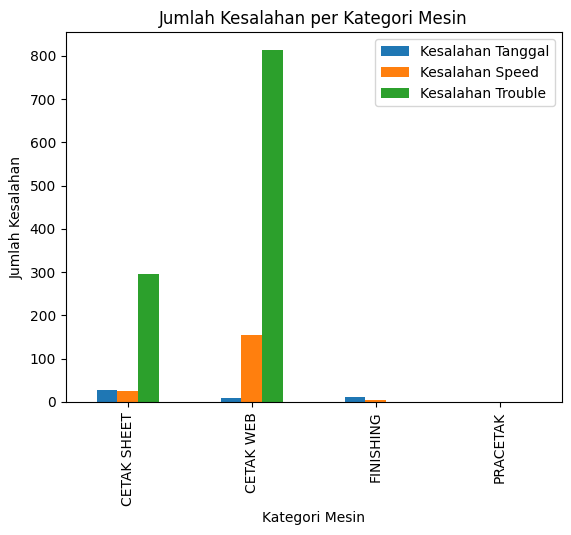

In [ ]:
kesalahan = Laporan.groupby(['KATEGORI'])[['Kesalahan Tanggal','Kesalahan Trouble','Kesalahan Speed']].sum().reset_index()
kesalahan.plot(x="KATEGORI", y=["Kesalahan Tanggal", "Kesalahan Speed", "Kesalahan Trouble"], kind="bar")
plt.title("Jumlah Kesalahan per Kategori Mesin")
plt.xlabel("Kategori Mesin")
plt.ylabel("Jumlah Kesalahan")
plt.savefig('kesalahan.png', transparent=True)
plt.show()

In [ ]:
kesalahan = Laporan.groupby(['Bulan','KATEGORI'])[['Kesalahan Tanggal','Kesalahan Trouble','Kesalahan Speed']].sum().reset_index()
kesalahan.plot(x="Bulan", y=["Kesalahan Speed"], hue='KATEGORI', kind="stacked")
plt.title("Jumlah Kesalahan per Kategori Mesin")
plt.xlabel("Kategori Mesin")
plt.ylabel("Jumlah Kesalahan")
plt.savefig('kesalahan.png', transparent=True)
plt.show()

ValueError: stacked is not a valid plot kind

# Download Data

In [ ]:
from google.colab import files
Laporan.to_excel('Laporan Data Produksi.xlsx')
files.download('Laporan Data Produksi.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>